In [10]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
job_data = pd.read_csv('media/output/training_all_data.csv', sep='@')

In [4]:
job_data.head()

,title,description
0,technician,We are looking for a dependable Pharmacy Techn...
1,coach,Required License Type: CDL-B Required License ...
2,human resourc,"Working at the Y, you have the opportunity to ..."
3,offic,"Multifaceted, engagingÂ & challenging role.Â ..."
4,offic,The High Companies began our work in 1931 with...


In [5]:
job_data.describe(), job_data.title.value_counts(normalize=True)

(                  title                                        description
 count             17479                                              17478
 unique               40                                              17478
 top     softwar develop  We are looking for a dependable Pharmacy Techn...
 freq               4808                                                  1,
 softwar develop               0.275073
 technician                    0.089536
 therapist                     0.071972
 clerk                         0.068311
 receptionist                  0.064935
 teacher                       0.053779
 cashier                       0.037702
 custom servic                 0.035185
 architect                     0.032496
 offic                         0.027347
 warehous                      0.025917
 coach                         0.019280
 it specialist                 0.017221
 human resourc                 0.016877
 technologist                  0.016076
 social worker     

In [44]:
wordcloud_title = WordCloud(collocation_threshold = 1,
                      collocations= True,
                      background_color="white",
                      max_words=100, 
                      max_font_size=35).generate(' '.join(job_data.title.unique().tolist()))

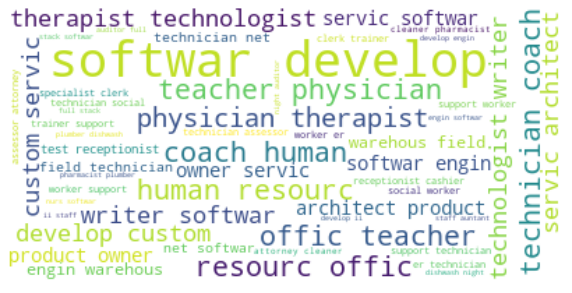

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
wordcloud_description = WordCloud(collocation_threshold = 1,
                      collocations= True,
                      background_color="white",
                      colormap="afmhot").generate(job_data.description.unique().tolist()[0])

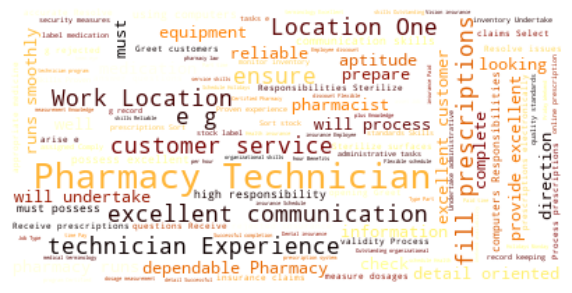

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
job_data.iloc[0]

title                                                 technician
description    We are looking for a dependable Pharmacy Techn...
Name: 0, dtype: object

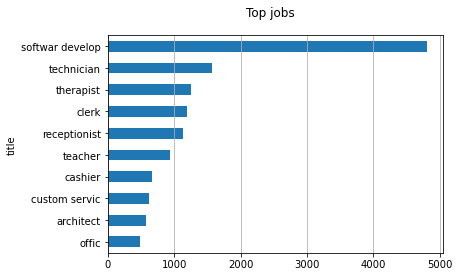

In [31]:
fig, ax = plt.subplots()
fig.suptitle('Top jobs', fontsize=12)
job_data['title'].reset_index().groupby('title').count().sort_values(by="index").tail(10).plot(kind="barh",
                                                                                                       legend=False,
                                                                                                       ax=ax).grid(
    axis='x')
plt.show()
